In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import VisualDataMaker
import CNNRegressAndSoftmax as CRS
import tensorflow as tf
import keras
from keras import Input, Model

In [13]:
data, OHE_LABELS = VisualDataMaker.combine("./random_BG_IMG/n_data/*.jpg", "./original_DOB_images/*.png")
bounded_DOB = VisualDataMaker.plot_bounding_box(data)

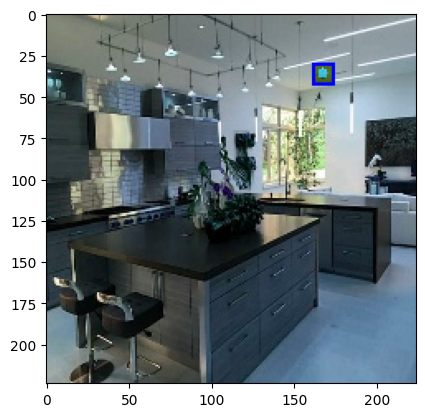

In [14]:
plt.imshow(bounded_DOB[158][0])
plt.show()

In [15]:
batch = []
regr_truth = []
class_truth = []
for i in range(len(data)):
    batch.append(data[i][0])
    regr_truth.append([data[i][2][0], data[i][2][1]])
    class_truth.append(OHE_LABELS[data[i][1]])
    

In [16]:
batch = np.array(batch)
regr_truth = np.array(regr_truth)
class_truth = np.array(class_truth)

In [17]:
batch.shape, regr_truth.shape, class_truth.shape

((2300, 224, 224, 3), (2300, 2), (2300, 10))

In [18]:
batch = tf.keras.backend.constant(batch)

In [19]:
input = Input((224, 224, 3))
x = CRS.convolutional_block(input)
box_output = CRS.regression_block_forward(x)
class_output = CRS.classification_block_forward(x)
model = keras.Model(inputs=input, outputs = [class_output, box_output])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss={'class': 'categorical_crossentropy', 'boundary_box': 'mse'}, metrics={'class': 'accuracy', 'boundary_box': 'mse'})

In [21]:
model_output = model.fit(batch, [class_truth, regr_truth], epochs=5, batch_size=32)

Epoch 1/5
72/72 [==============================] - 124s 2s/step - loss: 6130.4229 - class_loss: 18.9062 - boundary_box_loss: 6111.5171 - class_accuracy: 0.0626 - boundary_box_mse: 6111.5171
Epoch 2/5
72/72 [==============================] - 127s 2s/step - loss: 3876.4177 - class_loss: 3.1964 - boundary_box_loss: 3873.2212 - class_accuracy: 0.0678 - boundary_box_mse: 3873.2212
Epoch 3/5
72/72 [==============================] - 130s 2s/step - loss: 1422.6404 - class_loss: 2.3208 - boundary_box_loss: 1420.3195 - class_accuracy: 0.1626 - boundary_box_mse: 1420.3195
Epoch 4/5
72/72 [==============================] - 129s 2s/step - loss: 597.2721 - class_loss: 1.9439 - boundary_box_loss: 595.3284 - class_accuracy: 0.3261 - boundary_box_mse: 595.3284
Epoch 5/5
72/72 [==============================] - 128s 2s/step - loss: 371.2540 - class_loss: 1.5623 - boundary_box_loss: 369.6916 - class_accuracy: 0.4826 - boundary_box_mse: 369.6916


In [22]:
pc, pb = model.predict(batch[:2])

1/1 [==============================] - 0s 236ms/step


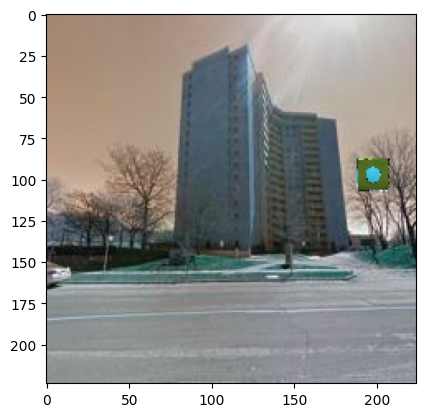

In [23]:
plt.imshow(data[0][0])
plt.show()

In [24]:
data[0][2]

(188, 88)

In [25]:
pb[0]

array([185.11987,  78.74548], dtype=float32)